# Group 22 Project Proposal

## Gender Wage Disparities in the United States: A Comparative Analysis

### Table of Contents

- [Introduction](#Introduction)
- [Preliminary Results](#Preliminary-Results)
    - [Data wrangling](#Data-wrangling)
    - [Plotting of relevant variables](#Plotting-of-relevant-variables)
- [Methods](#Methods)
- [References](#References)

# Introduction

The proposed project aims to investigate gender wage disparities in the United States using a dataset containing information on various demographic and employment-related variables. The primary question we seek to answer is whether there is a significant difference in wages between male and female workers. We will focus on the hourly wage as our main variable of interest to compare across the two genders. By analyzing this dataset, we aim to shed light on existing gender wage gaps and assess the potential impact of such disparities.

# Preliminary Results

## Data wrangling

In [1]:
library(infer)
library(repr)
library(readr)
library(tidyverse)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.4.1 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


We have successfully imported and cleaned the dataset, ensuring that the data is in a tidy format for analysis. We have also plotted the raw data, specifically examining the distribution of hourly wages for male and female workers. In the preliminary analysis, we observed that there is a clear difference in the distribution of hourly wages between males and females.

To estimate the gender wage disparity, we have computed summary statistics, including the median and standard deviation of hourly wages for both genders. These initial findings show that there is a substantial difference in average hourly wages between male and female workers.

In [2]:
raw_data <- read_csv('https://github.com/AVietCong/stat201-group22-project/raw/main/Gender_Pay_Gap_dataset.csv')
head(raw_data)

Rows: 53790 Columns: 129
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): adj_occ2name
dbl (127): year, serial, numprec, gq, region, statefip, metro, metarea, coun...
lgl   (1): farm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,serial,numprec,gq,region,statefip,metro,metarea,county,farm,⋯,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,4484,1,1,11,50,1,NA,NA,NA,⋯,0,0,0,0,0,0,0,0,1,1
2013,21761,3,1,21,39,3,2002,NA,NA,⋯,0,0,0,0,0,1,0,0,1,1
2013,7174,4,1,11,44,2,6483,NA,NA,⋯,0,0,0,0,0,0,0,0,1,1
2013,58428,1,1,31,12,3,4901,12009,NA,⋯,0,0,0,0,0,0,0,0,1,1
2013,2894,3,1,11,33,1,NA,NA,NA,⋯,0,0,0,0,0,0,0,1,1,1
2013,56021,1,1,31,12,4,2900,12001,NA,⋯,0,0,0,0,0,1,0,0,1,1


The dataset we will be using comprises information on a sample of individuals from the United States, including variables such as sex, race, hourly wage (hrwage), total income (incwage), years of schooling (sch), weeks worked in a year (wkswork1), usual hours worked per week (uhrswork), and other relevant factors. For our analysis, we have narrowed down the dataset to focus only on the variables of interest, namely sex, race, hourly wage, total income, schooling years, weeks worked, and usual hours worked.

In [3]:
raw_data$industry <- colnames(raw_data[,89:127])[apply(raw_data[,89:127], 1, which.max)]
head(raw_data)

year,serial,numprec,gq,region,statefip,metro,metarea,county,farm,⋯,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS,industry
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2013,4484,1,1,11,50,1,NA,NA,NA,⋯,0,0,0,0,0,0,0,1,1,Medical
2013,21761,3,1,21,39,3,2002,NA,NA,⋯,0,0,0,0,1,0,0,1,1,publicadmin
2013,7174,4,1,11,44,2,6483,NA,NA,⋯,0,0,0,0,0,0,0,1,1,professional
2013,58428,1,1,31,12,3,4901,12009,NA,⋯,0,0,0,0,0,0,0,1,1,finance
2013,2894,3,1,11,33,1,NA,NA,NA,⋯,0,0,0,0,0,0,1,1,1,miningconstruction
2013,56021,1,1,31,12,4,2900,12001,NA,⋯,0,0,0,0,1,0,0,1,1,miningconstruction


In [4]:
filtered_data <- select(raw_data, sex, race, hrwage, incwage, sch, wkswork1, uhrswork, potexp, industry) %>%
    mutate(sex = as.factor(sex),
           race = as.factor(race),
           hrwage = as.double(hrwage),
           incwage = as.double(incwage),
           sch = as.double(sch),
           wkswork = as.integer(wkswork1),
           uhrswork = as.integer(uhrswork),
           potexp = as.integer(potexp),
            industry = as.character(industry))
head(filtered_data)

sex,race,hrwage,incwage,sch,wkswork1,uhrswork,potexp,industry,wkswork
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>
1,1,24.91259,57000,14,52,44,42,Medical,52
1,1,31.00000,62000,13,50,40,40,publicadmin,50
1,3,21.63461,45000,12,52,40,26,professional,52
1,1,12.82051,28000,12,52,42,23,finance,52
1,1,21.25000,42500,12,50,40,17,miningconstruction,50
1,1,21.87500,35000,11,40,40,18,miningconstruction,40


In [10]:
pay_data <- filtered_data %>%
    mutate(sex = fct_recode(sex, 'male' = '1', 'female' = '2'),
           race = fct_recode(race, 'White' = '1', 'Black' = '2', 'Hispanic' = '3', 'Other' = '4'),
           education_level = case_when(sch == 0 ~ 'None',
                                       sch < 12 ~ 'Incomplete Schooling', 
                                       sch == 12 ~ 'Highschool',
                                       sch == 13 ~ 'College',
                                       sch == 14 ~ 'Associate Degree',
                                       sch <= 16 ~ 'BA',
                                       sch <= 18 ~ 'Advanced Degree'))
head(pay_data)

sex,race,hrwage,incwage,sch,wkswork1,uhrswork,potexp,industry,wkswork,education_level
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<chr>
male,White,24.91259,57000,14,52,44,42,Medical,52,Associate Degree
male,White,31.00000,62000,13,50,40,40,publicadmin,50,College
male,Hispanic,21.63461,45000,12,52,40,26,professional,52,Highschool
male,White,12.82051,28000,12,52,42,23,finance,52,Highschool
male,White,21.25000,42500,12,50,40,17,miningconstruction,50,Highschool
male,White,21.87500,35000,11,40,40,18,miningconstruction,40,Incomplete Schooling


## Plotting of relevant variables

Total Counts of Male and Female

In [11]:
sex_summary <- pay_data |>
    group_by(sex) |>
    summarise(count = n())
sex_summary

sex,count
<fct>,<int>
male,27225
female,26565


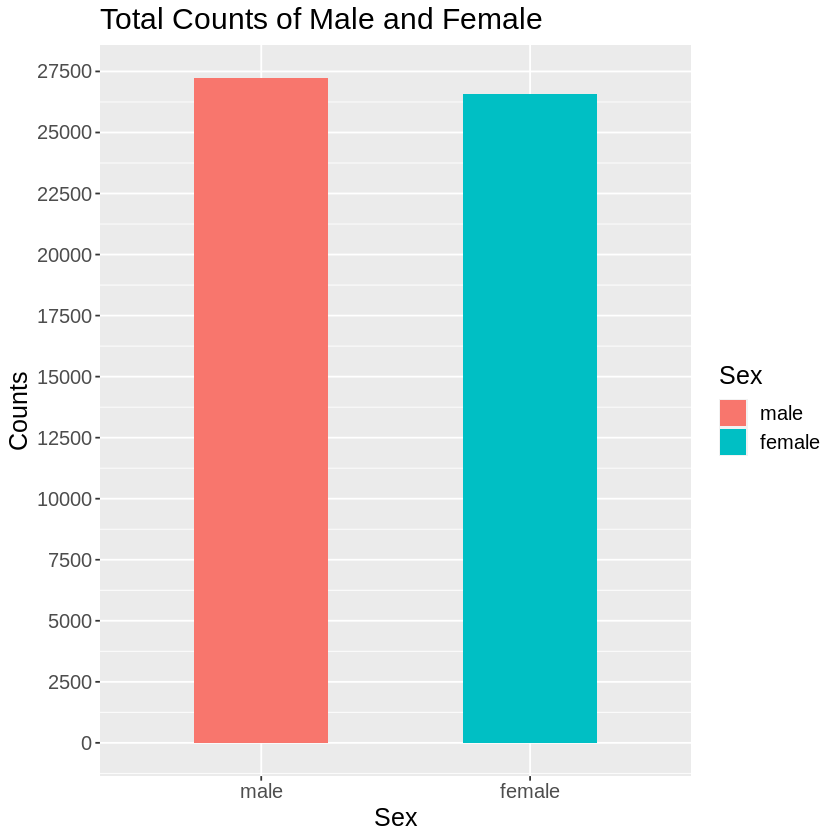

In [12]:
sex_plot <- sex_summary |>
    ggplot(aes(x = sex, y = count, fill = sex)) +
    geom_bar(stat = "identity", width = 0.5) +
    scale_y_continuous(breaks=seq(0, 27500, by = 2500)) +
    labs(x = "Sex", y = "Counts", fill = "Sex") +
    theme(text = element_text(size = 15)) +
    ggtitle("Total Counts of Male and Female")
    
sex_plot

### Average Potential Experience of Man and Woman

In [13]:
avg_potexp_summary <- pay_data %>%
    group_by(sex) %>%
    summarise(avg_potexp = mean(potexp))
avg_potexp_summary

sex,avg_potexp
<fct>,<dbl>
male,22.64522
female,22.77030


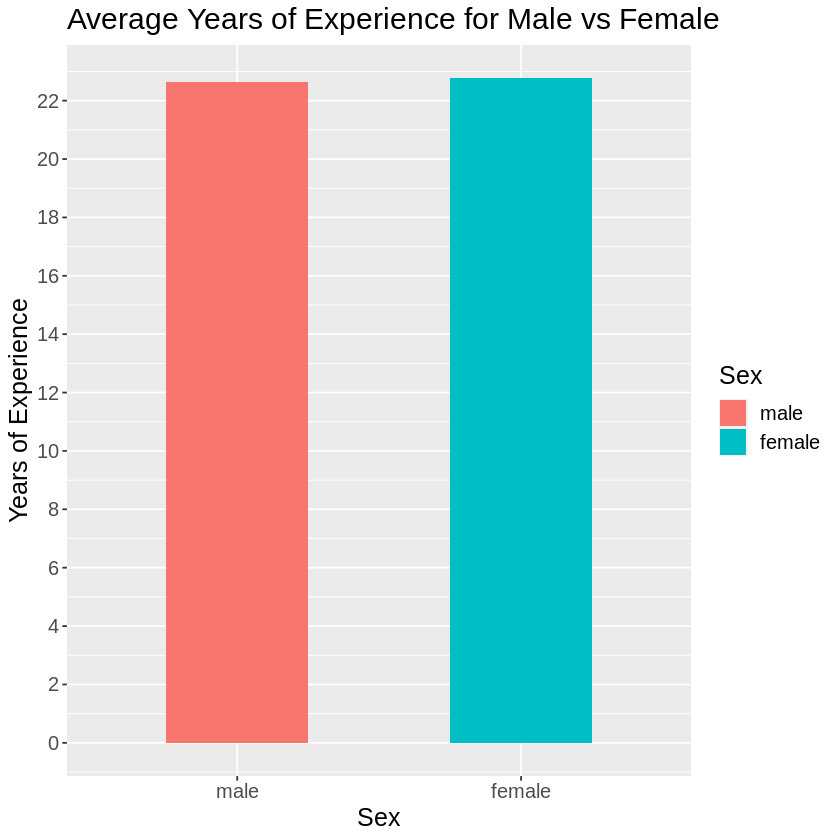

In [14]:
avg_potexp_plot <- ggplot(avg_potexp_summary, aes(x = sex, y = avg_potexp, fill = sex)) + 
    geom_bar(stat = 'identity', width = 0.5) + 
    scale_y_continuous(breaks=seq(0, 25, by = 2)) +
    labs(x = 'Sex', y = 'Years of Experience', title = 'Average Years of Experience for Male vs Female', fill = "Sex") +
    theme(text = element_text(size = 15))

avg_potexp_plot

### Education Level

In [15]:
education_level_summary <- pay_data %>%
    group_by(sex) %>%
    summarise(none = mean(education_level == 'None') * 100,
              incomplete = mean(education_level == 'Incomplete Schooling') * 100,
              highschool = mean(education_level == 'Highschool') * 100,
              college = mean(education_level == 'College') * 100,
              associate = mean(education_level == 'Associate Degree') * 100,
              ba = mean(education_level == 'BA') * 100,
              postsec = mean(education_level == 'Advanced Degree') * 100)
education_level_summary

sex,none,incomplete,highschool,college,associate,ba,postsec
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
male,0.2754821,7.911846,29.18274,16.60606,10.43159,22.69238,12.89991
female,0.1392810,5.010352,24.25748,16.79277,13.41991,25.31526,15.06494


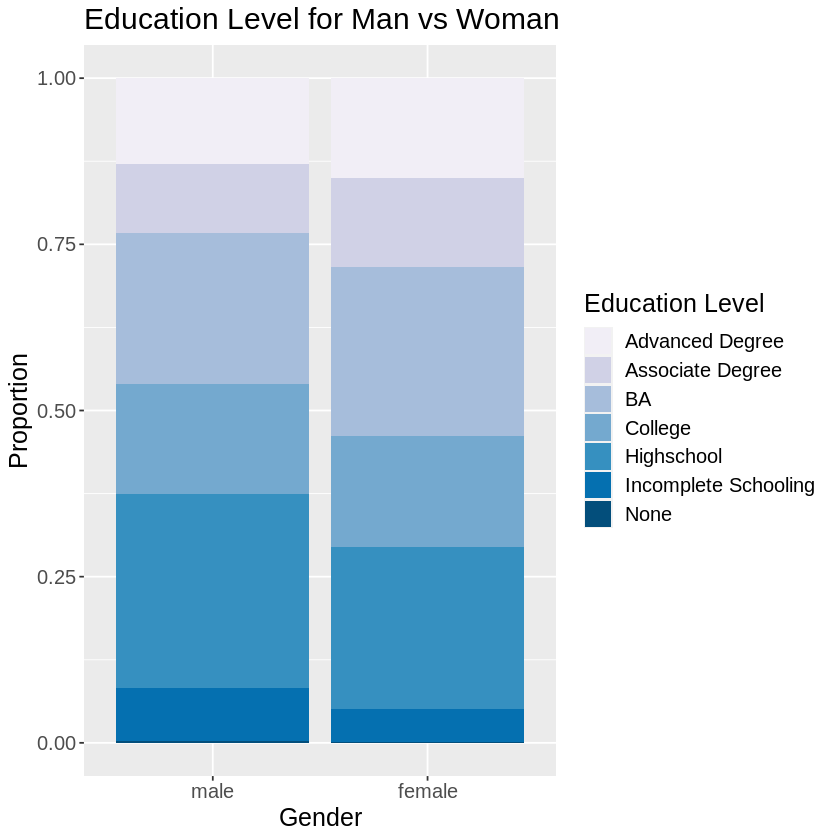

In [17]:
schooling_plot <- ggplot(pay_data, aes(x = sex, fill = factor(education_level))) + 
    geom_bar(position = 'fill') + 
    labs(x = 'Gender', y = 'Proportion', title = 'Education Level for Man vs Woman', fill = 'Education Level') +
    theme(text = element_text(size = 15)) +
    scale_fill_brewer(palette = 'PuBu')

schooling_plot

# Methods

# References